# **Market Basket Analysis (MBA)**
* mlxtend apriori: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

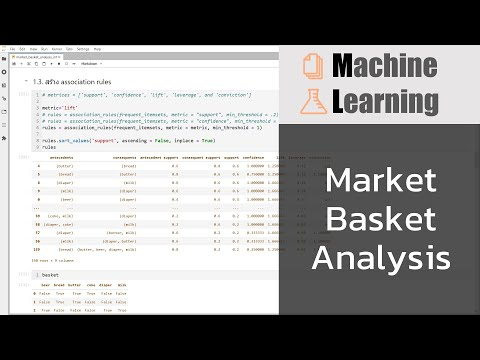

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Abbj3VzNtXQ', width=720, height=405)

In [13]:
!pip install mlxtend

In [14]:
!pip install fpgrowth

  Created wheel for fpgrowth: filename=fpGrowth-1.0.0-cp37-none-any.whl size=2868 sha256=732dd20483aff0c916f6adc1ba2db8bb4b4b8a764141c71cffe61f1cce145332
  Stored in directory: /root/.cache/pip/wheels/97/69/26/04160158e5614c425976747ccae9307c38e6c83c31eca46b28
Successfully built fpgrowth


In [15]:
!pip install apriori

  Created wheel for apriori: filename=apriori-1.0.0-cp37-none-any.whl size=2478 sha256=3ed5e3c6c99ce67ff7c4b49ae55556684c1cb6392970f6f62ca8d6f630e5ae68
  Stored in directory: /root/.cache/pip/wheels/20/c3/82/6e5f443b9a41b1e9ad991017fb64814bc75b4654409a073ea3
Successfully built apriori


In [16]:
!pip install association_rules

ERROR: Could not find a version that satisfies the requirement association_rules (from versions: none)
ERROR: No matching distribution found for association_rules


In [17]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth

%config InlineBackend.figure_format='retina'

ImportError: ignored

In [18]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.1.5
mlxtend   version: 0.14.0


In [19]:
pd.Timestamp.now()

Timestamp('2021-05-11 05:24:47.833824')

## **read and transform basket data**

trans,items
1,butter|bread|coke
2,bread|butter
3,beer|diaper|milk
4,beer|bread|butter|diaper|milk
5,coke|diaper|milk|bread

In [20]:
# data=pd.read_clipboard(sep=',')
# data

In [21]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [22]:
basket=data['items'].str.get_dummies('|')
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,0,1,1,1,0,0
1,0,1,1,0,0,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,0,1,1,1


In [23]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   beer    5 non-null      int64
 1   bread   5 non-null      int64
 2   butter  5 non-null      int64
 3   coke    5 non-null      int64
 4   diaper  5 non-null      int64
 5   milk    5 non-null      int64
dtypes: int64(6)
memory usage: 368.0 bytes


In [24]:
basket=basket.astype(pd.SparseDtype("bool"))
basket[:10]

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [25]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   beer    5 non-null      Sparse[bool, False]
 1   bread   5 non-null      Sparse[bool, False]
 2   butter  5 non-null      Sparse[bool, False]
 3   coke    5 non-null      Sparse[bool, False]
 4   diaper  5 non-null      Sparse[bool, False]
 5   milk    5 non-null      Sparse[bool, False]
dtypes: Sparse[bool, False](6)
memory usage: 213.0 bytes


## **สร้าง frequent_itemsets พร้อมระบุ min_support¶**

In [26]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [27]:
# frequent_itemsets = apriori(basket, min_support = 0.05, use_colnames = True)
frequent_itemsets = fpgrowth(basket, min_support = 0.05, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

NameError: ignored

## **สร้าง association rules**

In [28]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules

NameError: ignored